In [2]:
import pandas as pd

data = [
    [3, 9, 'A1'],
    [4.5, 6, 'A2'],
    [6, 3, 'A3'],
    [9, 7.5, 'A4'],
    [6, 12, 'A5'],
    [10.5, 4.5, 'A6'],
    [12, 9, 'A7'],
    [3, 1.5, 'A8'],
    [6, 13.5, 'A9']
]

df = pd.DataFrame(data, columns=['exp', 'tech', 'label'])

# we will create anchor points for k-means clustering
Anchor1 = (3, 9)
Anchor2 = (6, 12)
Anchor3 = (3, 1.5)

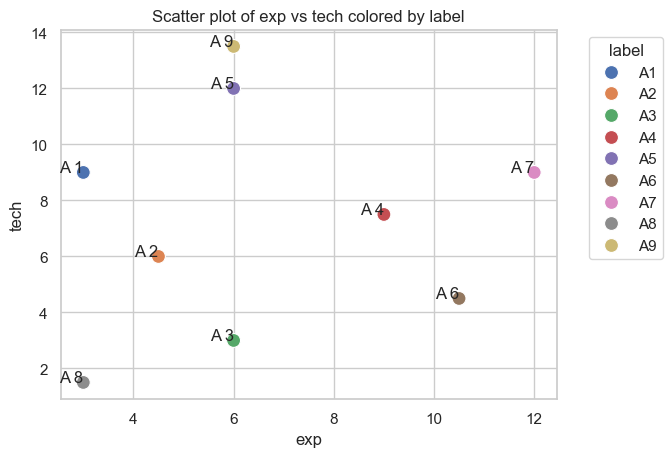

In [3]:
# create a scatter plot x as exp and y as tech and color the points by label
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.scatterplot(data=df, x='exp', y='tech', hue='label', s=100)
for i in range(len(df)):
    plt.text(df['exp'][i], df['tech'][i], f"A {i+1}", fontsize=12, ha='right')
plt.title('Scatter plot of exp vs tech colored by label')
plt.xlabel('exp')
plt.ylabel('tech')
plt.legend(title='label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

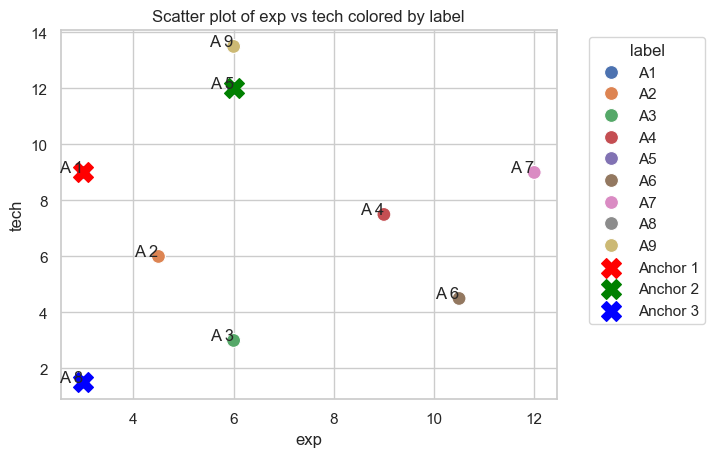

In [4]:
# create a scatter plot x as exp and y as tech and color the points by label
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.scatterplot(data=df, x='exp', y='tech', hue='label', s=100)
for i in range(len(df)):
    plt.text(df['exp'][i], df['tech'][i], f"A {i+1}", fontsize=12, ha='right')
# plot the anchor points
plt.scatter(*Anchor1, color='red', s=200, marker='X', label='Anchor 1')
plt.scatter(*Anchor2, color='green', s=200, marker='X', label='Anchor 2')
plt.scatter(*Anchor3, color='blue', s=200, marker='X', label='Anchor 3')
plt.title('Scatter plot of exp vs tech colored by label')
plt.xlabel('exp')
plt.ylabel('tech')
plt.legend(title='label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

### Displaying the Data Points with Labels and Groups after the Manual Assignment

In [5]:


# calculate the euclidean distance between each point and each anchor point
import numpy as np
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def choose_group_form_anchors(row):
    point = (row['exp'], row['tech'])
    distances = {
        'group 1': euclidean_distance(point, Anchor1),
        'group 2': euclidean_distance(point, Anchor2),
        'group 3': euclidean_distance(point, Anchor3)
    }
    return min(distances, key=distances.get)

df['group'] = df.apply(choose_group_form_anchors, axis=1)

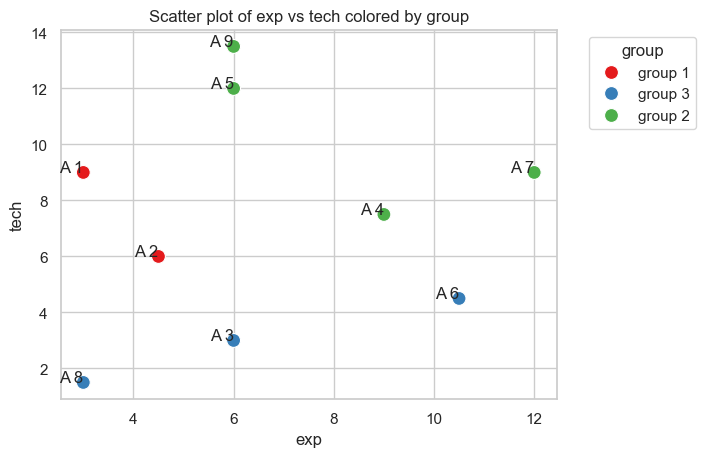

In [6]:
# create a scatter plot x as exp and y as tech and color the points by group
sns.scatterplot(data=df, x='exp', y='tech', hue='group', s=100, palette='Set1')
plt.title('Scatter plot of exp vs tech colored by group')
for i in range(len(df)):
    plt.text(df['exp'][i], df['tech'][i], f"A {i+1}", fontsize=12, ha='right')
plt.xlabel('exp')
plt.ylabel('tech')
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualizing the Clusters for one manual run of K-means with initial centroids

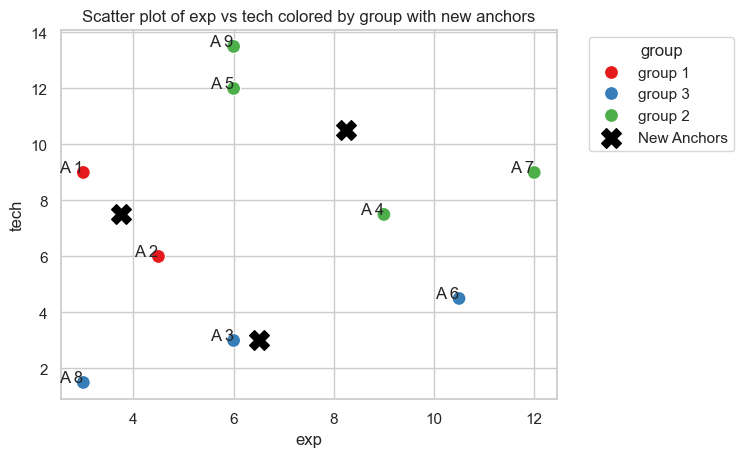

In [7]:
# calculate the new anchor points
new_anchors = df.groupby('group').agg({'exp': 'mean', 'tech': 'mean'}).reset_index()
# create the scatter plot with new anchors also display the labels of the points
sns.scatterplot(data=df, x='exp', y='tech', hue='group', s=100, palette='Set1')
for i in range(len(df)):
    plt.text(df['exp'][i], df['tech'][i], f"A {i+1}", fontsize=12, ha='right')
plt.scatter(new_anchors['exp'], new_anchors['tech'], color='black', s=200, marker='X', label='New Anchors')
plt.title('Scatter plot of exp vs tech colored by group with new anchors')
plt.xlabel('exp')
plt.ylabel('tech')
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
new_anchors
# calculate the euclidean distance between each point and each new anchor point
total_distance = 0
for i in range(len(df)):
    point = (df['exp'][i], df['tech'][i])
    if df['group'][i] == 'group 1':
        total_distance += euclidean_distance(point, (new_anchors['exp'][0], new_anchors['tech'][0]))
    elif df['group'][i] == 'group 2':
        total_distance += euclidean_distance(point, (new_anchors['exp'][1], new_anchors['tech'][1]))
    else:
        total_distance += euclidean_distance(point, (new_anchors['exp'][2], new_anchors['tech'][2]))
print(f"Total distance: {total_distance}")

Total distance: 25.51935667300252


### Running K-means clustering with initial centroids
* Run K-means clustering using sklearn with 2 clusters
* Set the initial centroids to be the a2 and a4 points
* Plot the resulting clusters and centroids
* We did this because the looks of the data suggests 2 clusters

In [9]:
# run k-means clustering using sklearn
from sklearn.cluster import KMeans
X = df[['exp', 'tech']]
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=100, n_init=10)
# set the initial centroids to be the a2 and a4 points
initial_centroids = np.array([[4.5, 6], [9, 7.5]])
kmeans.init = initial_centroids
kmeans.fit(X)
df['cluster'] = kmeans.labels_


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


Loss (Inertia): 119.475


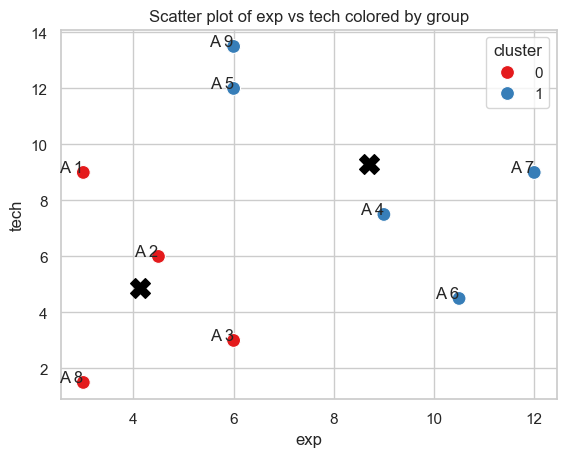

In [10]:
# create a scatter plot x as exp and y as tech and color the points by group
sns.scatterplot(data=df, x='exp', y='tech', hue='cluster', s=100, palette='Set1')
for i in range(len(df)):
    plt.text(df['exp'][i], df['tech'][i], f"A {i+1}", fontsize=12, ha='right')
plt.title('Scatter plot of exp vs tech colored by group')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=200, marker='X', label='Centroids')
plt.xlabel('exp')
# calculate the loss 
loss = kmeans.inertia_
print("Loss (Inertia):", loss)

### Test for k-means clustering with initial centroids

In [11]:
# run k-means clustering using sklearn
from sklearn.cluster import KMeans
X = df[['exp', 'tech']]
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=100, n_init=10)
# set the initial centroids to be the anchor points
initial_centroids = np.array([Anchor1, Anchor2, Anchor3])
kmeans.init = initial_centroids
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


,exp,tech,label,group,cluster
0,3.0,9.0,A1,group 1,0
1,4.5,6.0,A2,group 1,0
2,6.0,3.0,A3,group 3,2
3,9.0,7.5,A4,group 2,1
4,6.0,12.0,A5,group 2,1
5,10.5,4.5,A6,group 3,2
6,12.0,9.0,A7,group 2,1
7,3.0,1.5,A8,group 3,2
8,6.0,13.5,A9,group 2,1


Loss (Inertia): 85.875


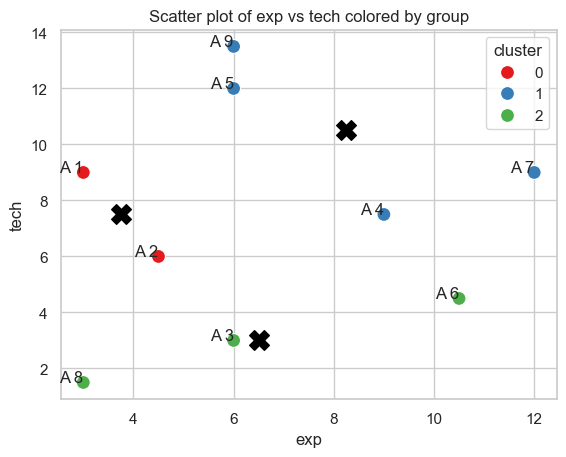

In [12]:
# create a scatter plot x as exp and y as tech and color the points by group
sns.scatterplot(data=df, x='exp', y='tech', hue='cluster', s=100, palette='Set1')
for i in range(len(df)):
    plt.text(df['exp'][i], df['tech'][i], f"A {i+1}", fontsize=12, ha='right')
plt.title('Scatter plot of exp vs tech colored by group')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=200, marker='X', label='Centroids')
plt.xlabel('exp')
# calculate the loss 
loss = kmeans.inertia_
print("Loss (Inertia):", loss)